In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from tqdm import tqdm

from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error,root_mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/Hotel Reservations (1).csv')

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
df = df.drop(columns='Booking_ID')

EDA

/tmp/ipython-input-2264415152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_status', data=df, palette='pastel')


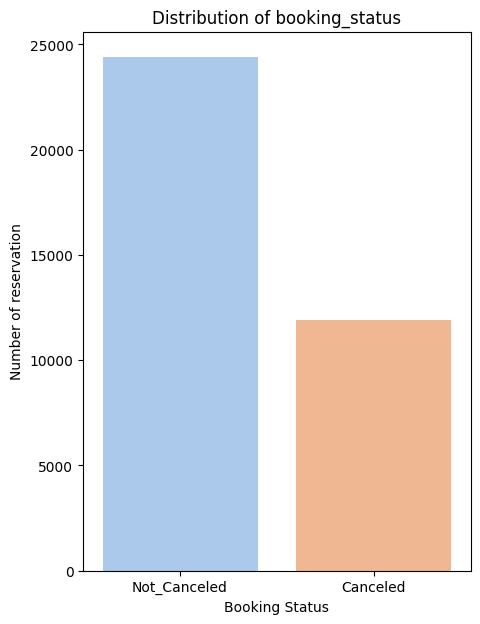

In [ ]:
plt.figure(figsize=(5,7))
sns.countplot(x='booking_status', data=df, palette='pastel')
plt.title('Distribution of booking_status')
plt.xlabel('Booking Status')
plt.ylabel('Number of reservation')
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
for col in num_cols:
  print(col)

no_of_adults
no_of_children
no_of_weekend_nights
no_of_week_nights
required_car_parking_space
lead_time
arrival_year
arrival_month
arrival_date
repeated_guest
no_of_previous_cancellations
no_of_previous_bookings_not_canceled
avg_price_per_room
no_of_special_requests


/tmp/ipython-input-1856823353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_status', y=col, data=df, palette='pastel')
/tmp/ipython-input-1856823353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_status', y=col, data=df, palette='pastel')
/tmp/ipython-input-1856823353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_status', y=col, data=df, palette='pastel')
/tmp/ipython-input-1856823353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

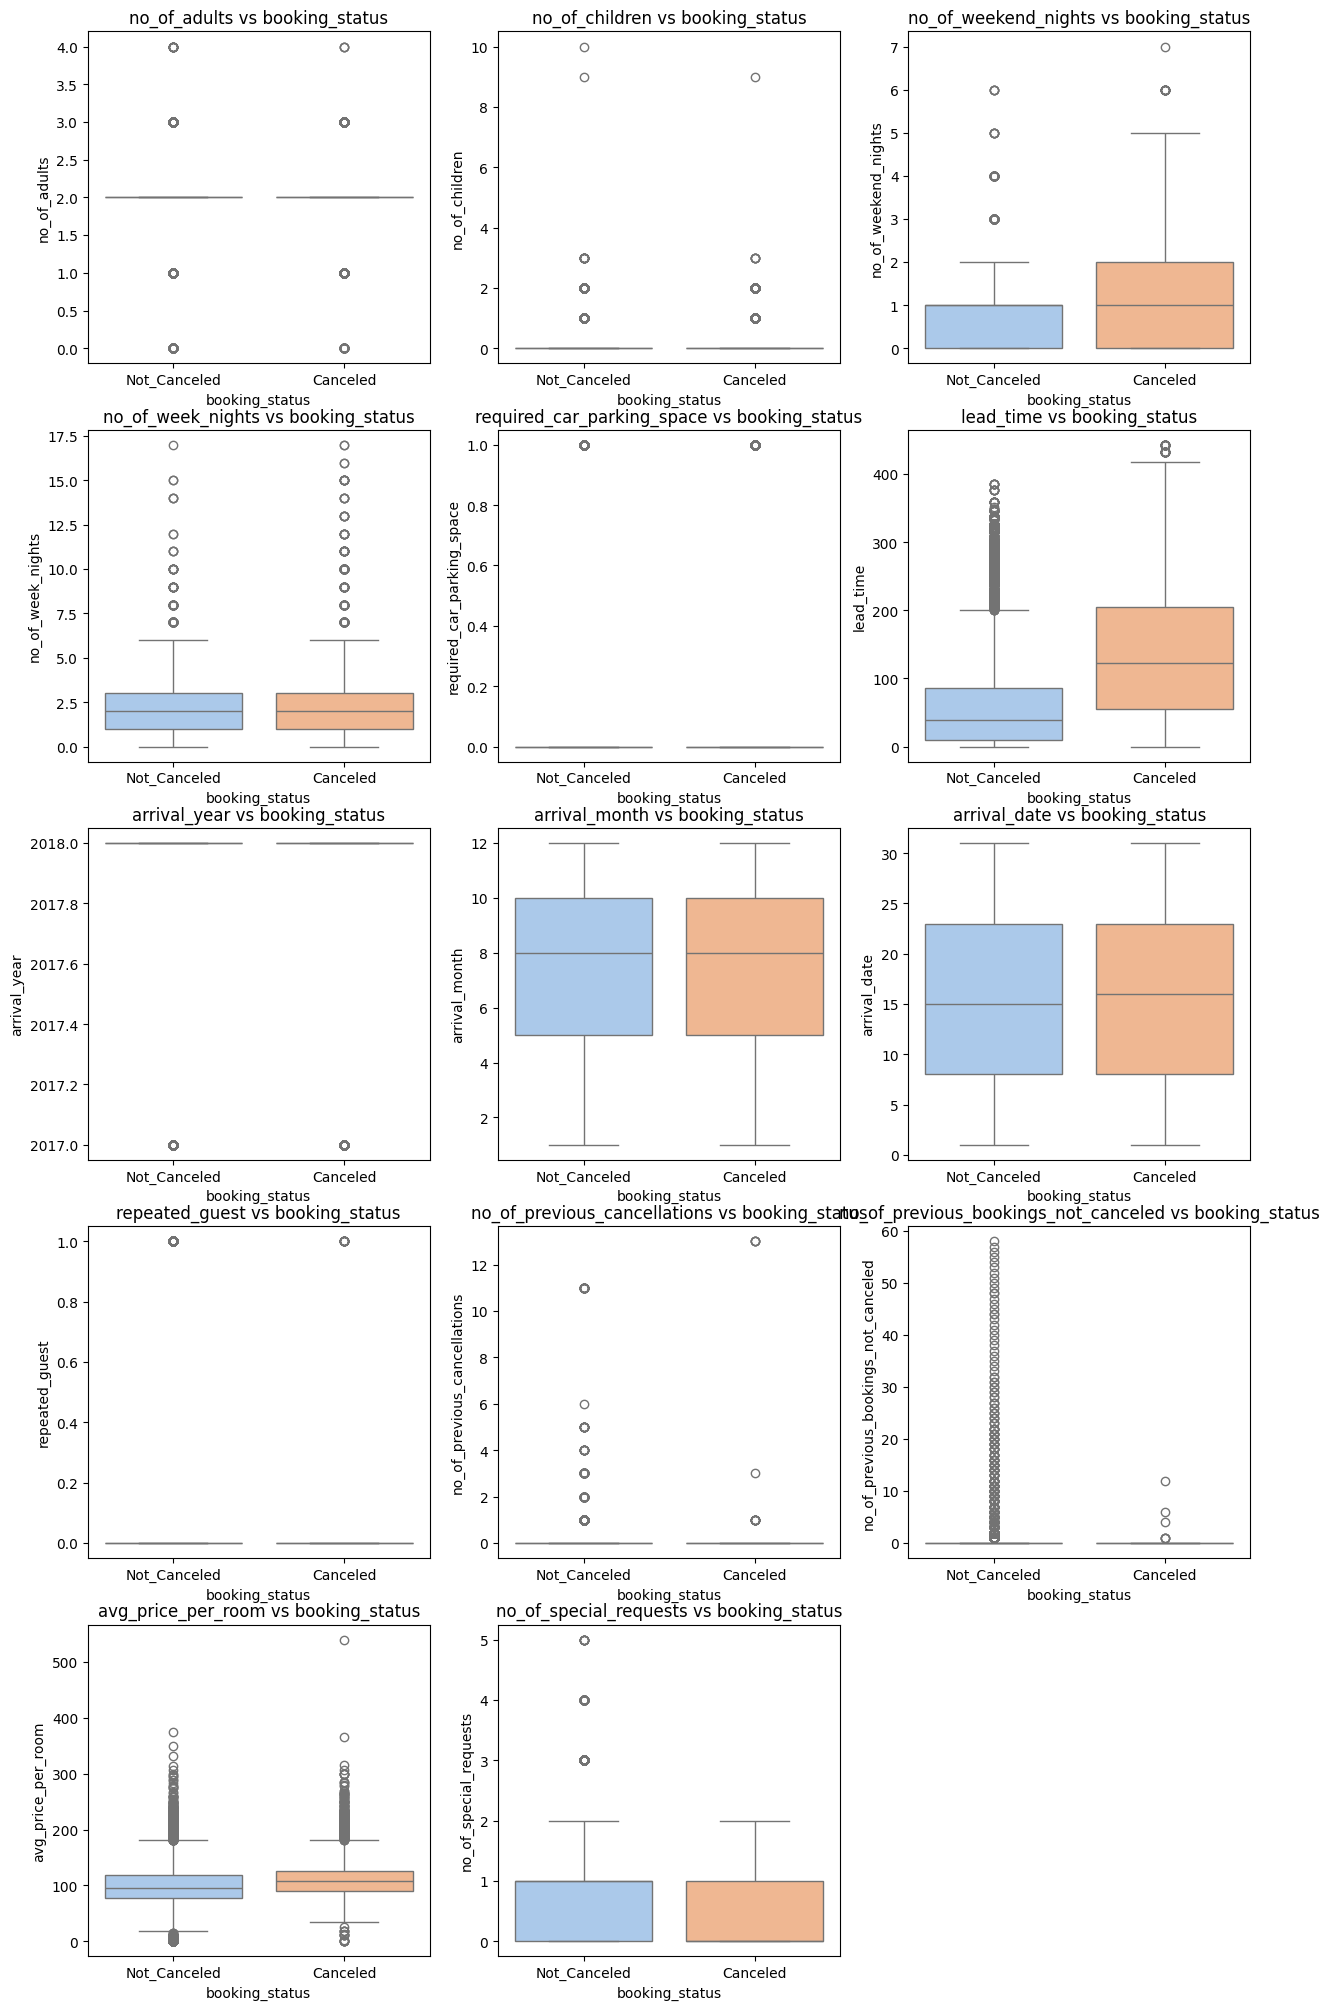

In [ ]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='booking_status', y=col, data=df, palette='pastel')
    plt.title(f"{col} vs booking_status")
    plt.xlabel("booking_status")

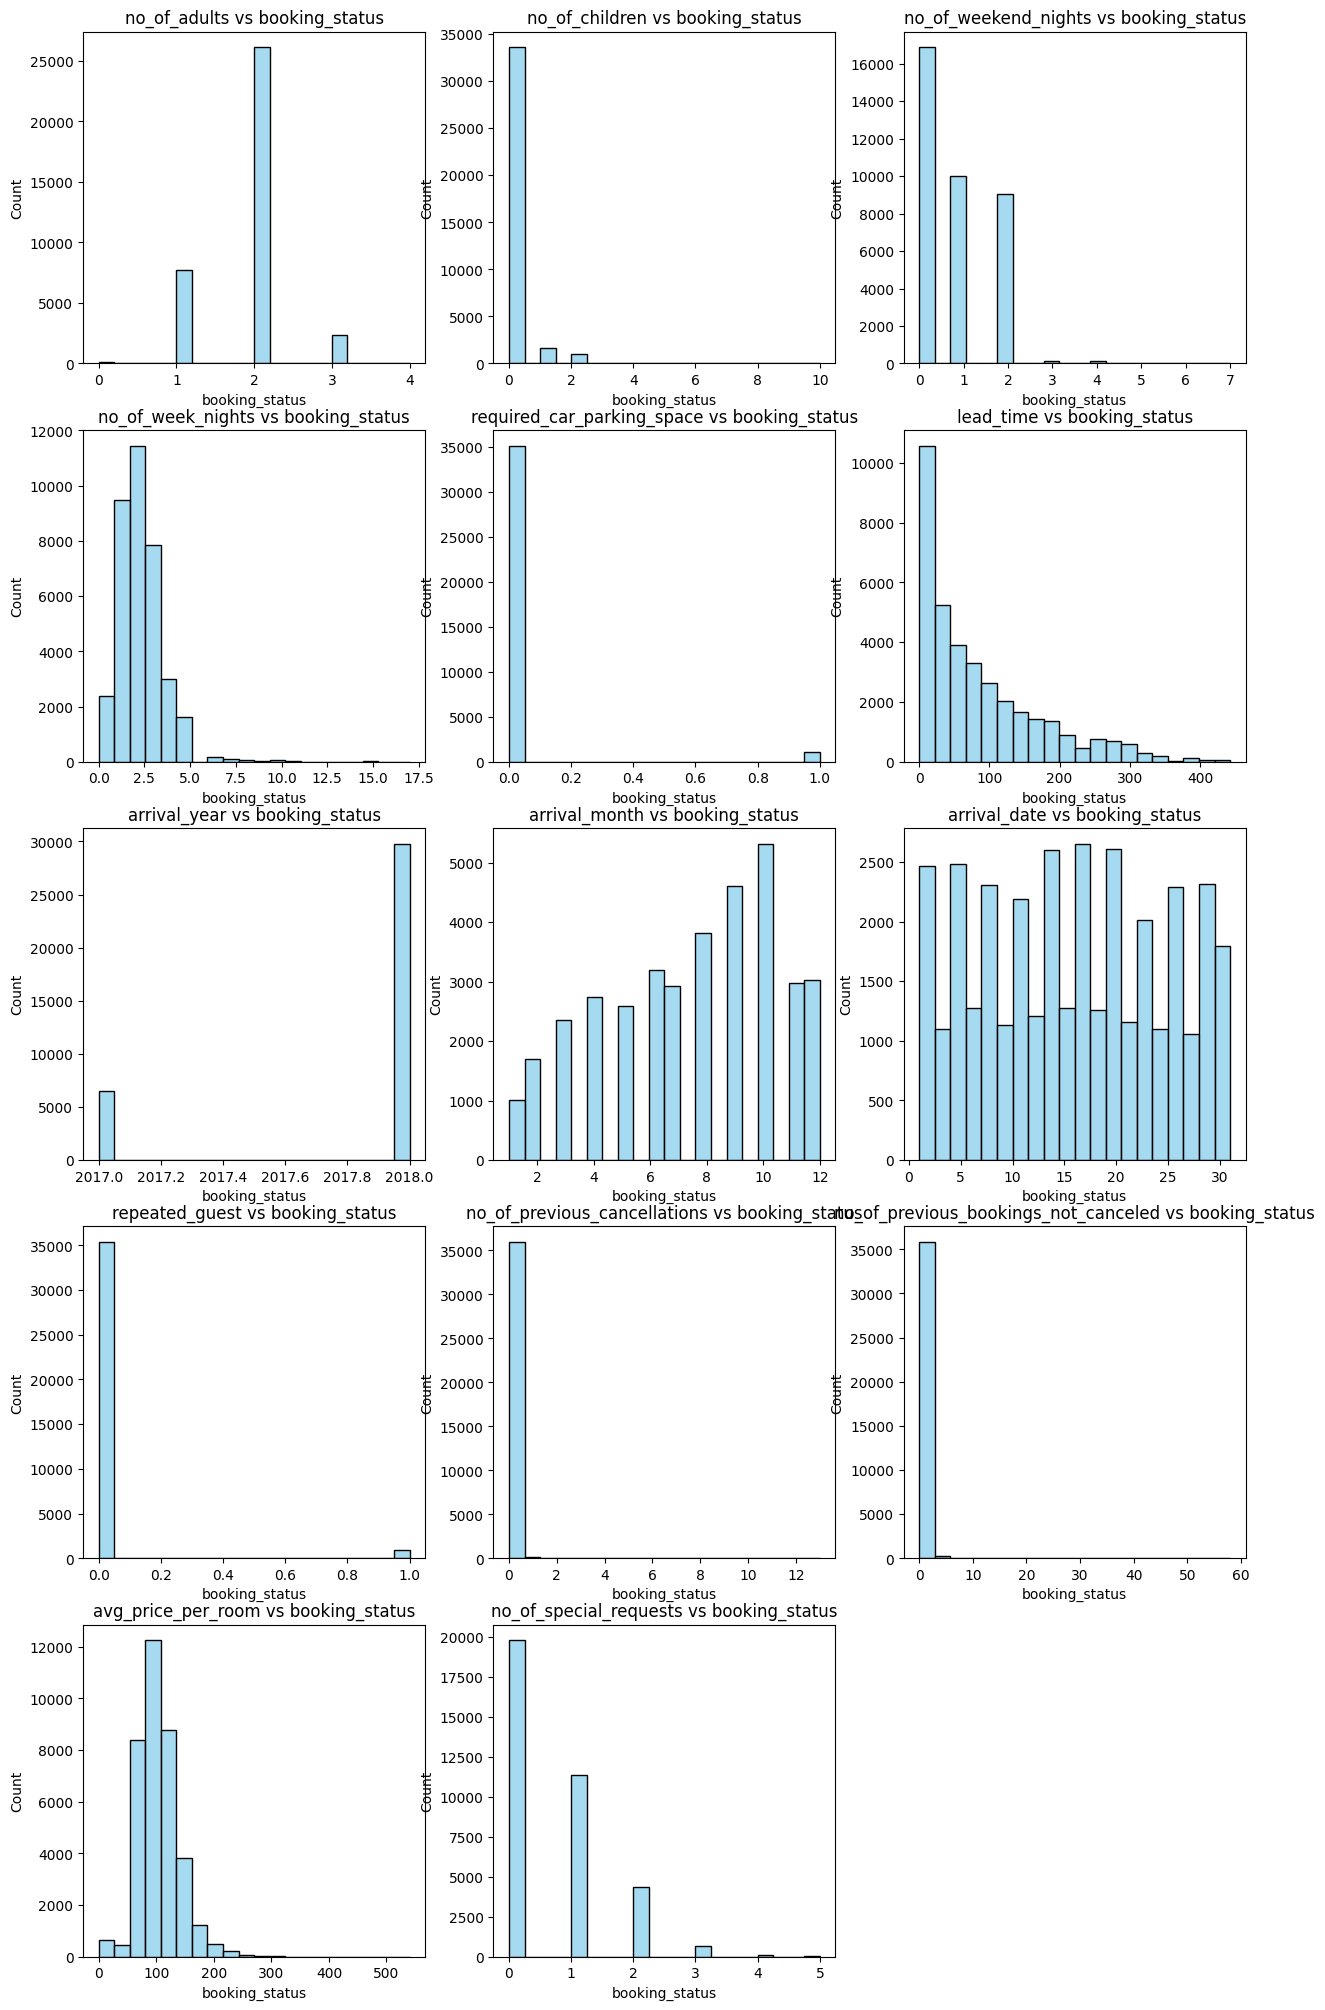

In [ ]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=20, color='skyblue',edgecolor='black')
    plt.title(f"{col} vs booking_status")
    plt.xlabel("booking_status")

Encoding

In [ ]:
df['type_of_meal_plan'].nunique()

4

In [ ]:
df['room_type_reserved'].nunique()

7

In [ ]:
df['market_segment_type'].nunique()

5

In [ ]:
df['booking_status'].nunique()

2

In [ ]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['type_of_meal_plan','room_type_reserved','market_segment_type'], dtype='int64')

In [ ]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns='booking_status')
y = df['booking_status'].values.reshape(X.shape[0],1)

In [ ]:
y.shape

(36275, 1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()

In [ ]:
cols_to_scale = ['no_of_adults', 'no_of_children','no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time','arrival_year', 'arrival_month', 'arrival_date',
                'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [ ]:
X_train[cols_to_scale] = mm.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = mm.transform(X_test[cols_to_scale])

Applying Classification Models

In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dt = DecisionTreeClassifier()
et = ExtraTreesClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()


In [ ]:
regressors_list = [lr,knn,svc,dt,et,ada,rf,gbc,xgb,lgbm]

In [ ]:
predictions = pd.DataFrame(y_test).reset_index(drop=True)

In [ ]:
predictions.head()

,0
0,0
1,0
2,0
3,1
4,0


In [ ]:
predictions.rename(columns={0:'booking_status'}, inplace=True)

In [ ]:
def apply_model(dataframe, to_predict, booking_status, regressors_list, X_train,y_train):
  for regressor in tqdm(regressors_list):
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    dataframe[f"{str(regressor).split('(')[0]}"] = y_pred
  return dataframe

In [ ]:
results_dataframe = apply_model(predictions, X_test, "booking_status", regressors_list, X_train,y_train)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 10%|█         | 1/10 [00:00<00:06,  1.44it/s]/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 20%|██        | 2/10 [00:02<00:11,  1.45s/it]/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 40%|████      | 4/10 [00:44<01:12, 12.09s/it]/usr/local/lib/python3.12/dist-packa

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9469, number of negative: 19551
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 29020, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326292 -> initscore=-0.725003
[LightGBM] [Info] Start training from score -0.725003


100%|██████████| 10/10 [00:58<00:00,  5.87s/it]


In [ ]:
predictions.head()

,booking_status,LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for column in predictions.drop(columns='booking_status').columns:
  print(column, mean_absolute_error(predictions['booking_status'], predictions[column]))

LogisticRegression 0.19586492074431427
KNeighborsClassifier 0.15299793246037216
SVC 0.17932460372157133
DecisionTreeClassifier 0.1268090971743625
ExtraTreesClassifier 0.10144727773949001
AdaBoostClassifier 0.18718125430737423
RandomForestClassifier 0.0946933149552033
GradientBoostingClassifier 0.1510682288077188
XGBClassifier 0.10751206064782909
LGBMClassifier 0.11481736733287388


ANN with Keras

In [ ]:
def ann_model():
  model = Sequential()
  model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [ ]:
model = ann_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train,y_train)

907/907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1841


In [ ]:
y_pred_ann = model.predict(X_test)

227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
print(mean_absolute_error(y_test,y_pred_ann))

0.29655173420906067


In [ ]:
print(root_mean_squared_error(y_test,y_pred_ann))

0.3701152205467224
